In [1]:
import pandas as pd
import sqlite3

In [2]:
connect_db = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
query = 'PRAGMA table_info(checker);'
pd.io.sql.read_sql(query, connect_db)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,status,TEXT,0,None,0
2,2,success,INTEGER,0,None,0
3,3,timestamp,TIMESTAMP,0,None,0
4,4,numTrials,INTEGER,0,None,0
5,5,labname,TEXT,0,None,0
6,6,uid,TEXT,0,None,0


In [3]:
query = '''
        select datetime from pageviews where uid like 'user_%'
        '''
pageviews = pd.io.sql.read_sql(query, connect_db, parse_dates=['datetime'])
pageviews.head()

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144


In [4]:
query = '''
        select timestamp from checker where uid like 'user_%'
        '''
checker = pd.io.sql.read_sql(query, connect_db, parse_dates=['timestamp'])
checker.head()

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [5]:
ds_pageviews = pageviews.groupby(pageviews.datetime.dt.date).count()
ds_pageviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2020-04-17 to 2020-05-22
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   datetime  33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


In [6]:
ds_checker = checker.groupby(checker.timestamp.dt.date).count()
ds_checker.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2020-04-17 to 2020-05-21
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   timestamp  35 non-null     int64
dtypes: int64(1)
memory usage: 560.0+ bytes


In [7]:
new_df = pd.concat([ds_pageviews, ds_checker], axis= 1)
new_df.fillna(method = 'ffill' , inplace=True)
new_df.columns = ['views', 'commits']
new_df.head()

,views,commits
2020-04-17,1.0,23.0
2020-04-18,23.0,69.0
2020-04-19,15.0,33.0
2020-04-21,3.0,25.0
2020-04-22,1.0,28.0


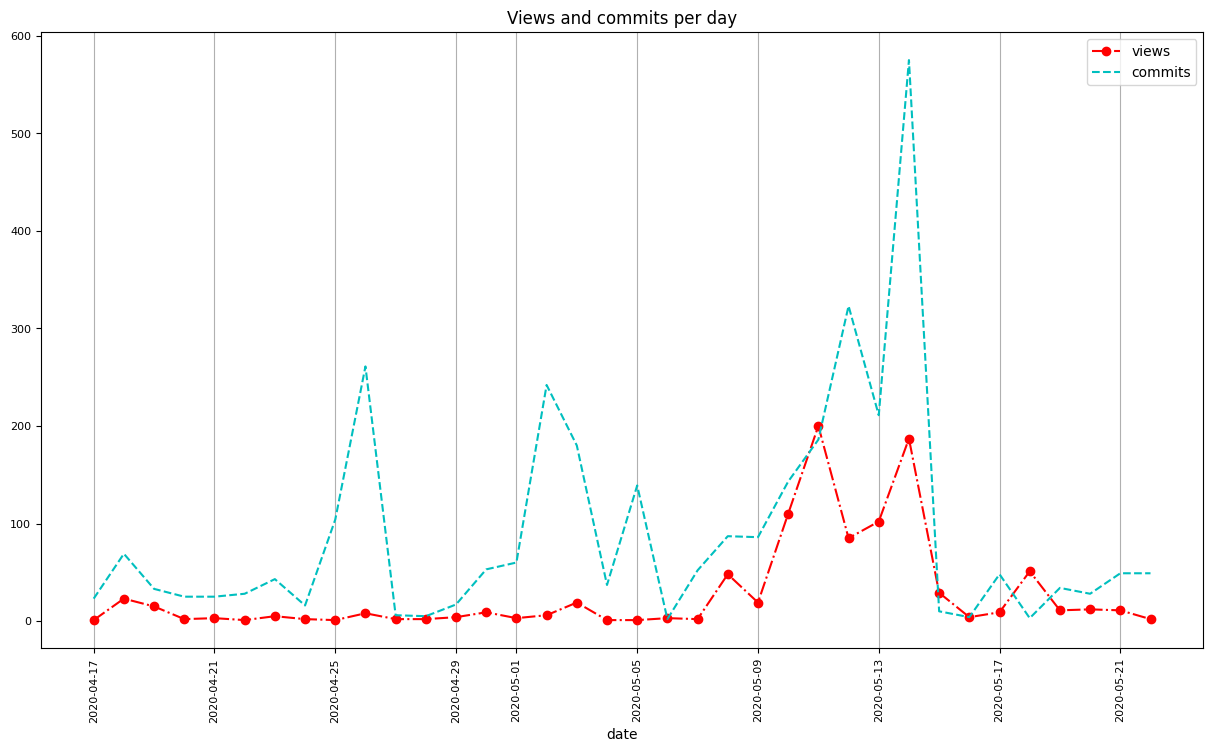

In [8]:
plot = new_df.plot(figsize= (15,8), title = 'Views and commits per day', fontsize=8, xlabel = 'date', rot = 90, color = ['red', 'c'], style = ['-.','--'],)
plot.grid('on', which='major', axis='x')
plot.get_lines()[0].set_marker('o')
plot.get_legend().get_lines()[0].set_marker('o')

In [9]:
new_df[new_df.views > 150].views.count()

2

In [10]:
connect_db.close()